In [1]:
# Importing the Keras libraries and packages
import tensorflow as tf

In [2]:
# Initialising the CNN
classifier = tf.keras.models.Sequential()

classifier.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=3, padding="same", input_shape=(64, 64, 3),
                                             activation='relu'))

classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, padding="same", activation="relu"))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Flatten())

classifier.add(tf.keras.layers.Dense(units=128, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [3]:
# Part 2 - Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory('Data/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('Data/test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [4]:
#training 
history = classifier.fit(training_set,
                         steps_per_epoch=4,
                         epochs=25,
                         validation_data=test_set,
                         validation_steps=4)

Epoch 1/25
4/4 [==============================] - 12s 3s/step - loss: 0.5819 - accuracy: 0.8000 - val_loss: 0.4737 - val_accuracy: 0.8800
Epoch 2/25
4/4 [==============================] - 5s 1s/step - loss: 0.4674 - accuracy: 0.8000 - val_loss: 0.3649 - val_accuracy: 0.8200
Epoch 3/25
4/4 [==============================] - 5s 2s/step - loss: 0.4100 - accuracy: 0.8300 - val_loss: 0.5449 - val_accuracy: 0.7700
Epoch 4/25
4/4 [==============================] - 5s 2s/step - loss: 0.3692 - accuracy: 0.8200 - val_loss: 0.2126 - val_accuracy: 0.9500
Epoch 5/25
4/4 [==============================] - 5s 1s/step - loss: 0.2467 - accuracy: 0.9300 - val_loss: 0.3077 - val_accuracy: 0.8800
Epoch 6/25
4/4 [==============================] - 5s 1s/step - loss: 0.2462 - accuracy: 0.9200 - val_loss: 0.1873 - val_accuracy: 0.9400
Epoch 7/25
4/4 [==============================] - 5s 1s/step - loss: 0.1578 - accuracy: 0.9500 - val_loss: 0.1653 - val_accuracy: 0.9400
Epoch 8/25
4/4 [========================

In [5]:
classifier.save('my_model.h5')

In [6]:
# evaluation on test set
loaded_model = tf.keras.models.load_model('my_model.h5')
loaded_model.evaluate(test_set)

4/4 [==============================] - 3s 536ms/step - loss: 0.1300 - accuracy: 0.9700


[0.12999309599399567, 0.9700000286102295]

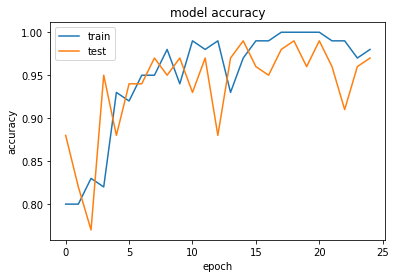

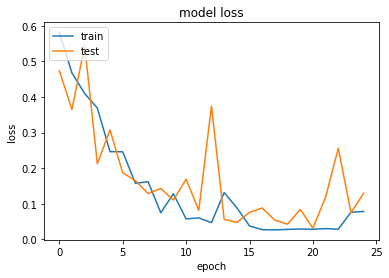

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
